In [2]:
from alpharaw.ms_data_base import ms_reader_provider
from alpharaw import register_all_readers
from dia_aspire_rescore.io import read_diann2
import matplotlib.pyplot as plt
from dia_aspire_rescore.psm.matcher import DIAPeptideSpectrumMatcher
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

register_all_readers()


/Users/zshang/Projects/DIA-Aspire-rescore/.venv/lib/python3.11/site-packages/alpharaw/raw_access/pysciexwifffilereader.py:44: UserWarning: Dotnet-based dependencies could not be loaded. Sciex support is disabled.
  warnings.warn(
/Users/zshang/Projects/DIA-Aspire-rescore/.venv/lib/python3.11/site-packages/alpharaw/raw_access/pythermorawfilereader.py:35: UserWarning: Dotnet-based dependencies could not be loaded. Thermo support is disabled.
  warnings.warn(


In [3]:
psm_df_original = read_diann2("../../data/raw/SYS026_RA957/DDA_SYSMHC_bynam/lib-base-result-first-pass.parquet")
# decreasing rt order
psm_df_sorted = psm_df_original.sort_values(by="rt", ascending=True)
psm_df_sorted

,raw_name,sequence,charge,rt,rt_start,rt_stop,mobility,proteins,uniprot_ids,genes,...,fdr1_search1,fdr2_search1,fdr1_search2,fdr2_search2,mods,mod_sites,nAA,rt_norm,precursor_mz,ccs
182391,20200317_QE_HFX2_LC3_DIA_RA957_R01,EAAKQMRSR,3,0.320100,0.100662,0.508281,0.0,2/sp|P36551|HEM6_HUMAN/sp|P36551-2|HEM6_HUMAN,2/sp|P36551|HEM6_HUMAN/sp|P36551-2|HEM6_HUMAN,,...,0.265428,1.000000,0.0,0.0,,,9,0.002675,359.525830,0.0
285284,20200317_QE_HFX2_LC3_DIA_RA957_R01,ESSRDTGQVK,3,0.320100,0.037964,0.602398,0.0,1/sp|A0A1B0GUI7|BRDOS_HUMAN,1/sp|A0A1B0GUI7|BRDOS_HUMAN,,...,0.492493,1.000000,0.0,0.0,,,10,0.002675,369.519398,0.0
283115,20200317_QE_HFX2_LC3_DIA_RA957_R01,EVSRDTGQSK,3,0.320100,0.037964,0.602398,0.0,1/sp|A0A1B0GUI7|BRDOS_HUMAN,1/sp|A0A1B0GUI7|BRDOS_HUMAN,,...,0.274327,0.004471,0.0,0.0,,,10,0.002675,369.519398,0.0
46342,20200317_QE_HFX2_LC3_DIA_RA957_R01,SVTSSTHEK,2,0.325708,0.043572,0.608008,0.0,1/sp|Q9NW08|RPC2_HUMAN,1/sp|Q9NW08|RPC2_HUMAN,,...,0.031545,0.001135,0.0,0.0,,,9,0.002721,488.240721,0.0
226620,20200317_QE_HFX2_LC3_DIA_RA957_R01,SETSSTHVK,2,0.325708,0.043572,0.608008,0.0,1/sp|Q9NW08|RPC2_HUMAN,1/sp|Q9NW08|RPC2_HUMAN,,...,1.000000,1.000000,0.0,0.0,,,9,0.002721,488.240721,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228125,20200317_QE_HFX2_LC3_DIA_RA957_R01,IPFSGALEL,1,119.682693,119.401268,119.870628,0.0,1/sp|Q9NTK5|OLA1_HUMAN,1/sp|Q9NTK5|OLA1_HUMAN,,...,0.000087,0.000124,0.0,0.0,,,9,1.000000,946.524410,0.0
222413,20200317_QE_HFX2_LC3_DIA_RA957_R01,SLVGIATYI,1,119.682693,119.557571,119.870628,0.0,1/sp|Q7Z6Z7|HUWE1_HUMAN,1/sp|Q7Z6Z7|HUWE1_HUMAN,,...,1.000000,1.000000,0.0,0.0,,,9,1.000000,936.540060,0.0
43522,20200317_QE_HFX2_LC3_DIA_RA957_R01,SYVGIATLI,1,119.682693,119.557571,119.870628,0.0,1/sp|Q7Z6Z7|HUWE1_HUMAN,1/sp|Q7Z6Z7|HUWE1_HUMAN,,...,1.000000,1.000000,0.0,0.0,,,9,1.000000,936.540060,0.0
43933,20200317_QE_HFX2_LC3_DIA_RA957_R01,TASLFVVSL,1,119.682693,119.526230,119.932961,0.0,1/uc004ftz.1,1/uc004ftz.1,,...,0.450818,1.000000,0.0,0.0,,,9,1.000000,936.540060,0.0


In [4]:
matcher = DIAPeptideSpectrumMatcher(n_neighbors=0)
psm_df, fragment_mz_df, matched_intensity_df, matched_mz_err_df = matcher.match_ms2_multi_raw(
    psm_df_sorted,
    {'20200317_QE_HFX2_LC3_DIA_RA957_R01': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R01.mzML.hdf5',
     '20200317_QE_HFX2_LC3_DIA_RA957_R02': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R02.mzML.hdf5'},
    'hdf5',
)

100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


In [5]:
from peptdeep.pretrained_models import ModelManager

mgr = ModelManager(
    mask_modloss=True
)

mgr.psm_num_to_train_rt_ccs = 3000
mgr.train_verbose = True
mgr.load_installed_models('generic')

In [6]:
# evaluate BEFORE fine-tuning
test_psm_df = psm_df[psm_df['fdr1_search1'] < 0.01].copy()

# Group by sequence, mods, mod_sites to get median RT 
test_psm_df_grouped = test_psm_df.groupby(
    ['sequence','mods','mod_sites']
)[['rt_norm']].median().reset_index(drop=False)

if len(test_psm_df_grouped) > 2000:
    test_psm_df_grouped = test_psm_df_grouped.sample(n=2000, random_state=42).copy()

print(f"Test dataset size: {len(test_psm_df_grouped)} PSMs")

print("\n=== BEFORE Fine-tuning ===")
print("RT Model Performance (Pretrained):")
rt_test_before = mgr.rt_model.test(test_psm_df_grouped)
print(rt_test_before)

test_psm_df_before = mgr.predict_rt(test_psm_df_grouped.copy())
rt_errors_before = (test_psm_df_before['rt_pred'] - test_psm_df_before['rt_norm']).abs()
print(f"\nRT Prediction Statistics (Before):")
print(f"  Mean absolute error: {rt_errors_before.mean():.4f} min")
print(f"  Median absolute error: {rt_errors_before.median():.4f} min")
print(f"  Std absolute error: {rt_errors_before.std():.4f} min")

Test dataset size: 2000 PSMs

=== BEFORE Fine-tuning ===
RT Model Performance (Pretrained):
   R_square         R     slope  intercept  test_num
0  0.964457  0.982068  0.960168   0.151654      2000
2025-11-21 15:51:40> Predicting RT ...


100%|██████████| 7/7 [00:00<00:00, 26.48it/s]


RT Prediction Statistics (Before):
  Mean absolute error: 0.1398 min
  Median absolute error: 0.1383 min
  Std absolute error: 0.0381 min


In [7]:
print("\n=== Fine-tuning RT Model ===")
# Use high-confidence PSMs for training
train_psm_df = psm_df[psm_df['fdr1_search1'] < 0.01].copy()
print(f"Training dataset size: {len(train_psm_df)} PSMs")

# Fine-tune RT model
mgr.train_rt_model(train_psm_df)


=== Fine-tuning RT Model ===
Training dataset size: 83145 PSMs
2025-11-21 15:51:54> 3103 PSMs for RT model training/transfer learning
2025-11-21 15:51:54> Training with fixed sequence length: 0
[Training] Epoch=1, lr=2e-05, loss=0.1343569178134203
[Training] Epoch=2, lr=3e-05, loss=0.13140830770134926
[Training] Epoch=3, lr=4e-05, loss=0.1269105551764369
[Training] Epoch=4, lr=5e-05, loss=0.12017207778990269
[Training] Epoch=5, lr=6e-05, loss=0.11240711621940136
[Training] Epoch=6, lr=7e-05, loss=0.10160376783460379
[Training] Epoch=7, lr=8e-05, loss=0.08915198314934969
[Training] Epoch=8, lr=9e-05, loss=0.075310034211725
[Training] Epoch=9, lr=0.0001, loss=0.05890036141499877
[Training] Epoch=10, lr=0.0001, loss=0.04475355101749301
[Training] Epoch=11, lr=9.972609476841367e-05, loss=0.035720252664759755
[Training] Epoch=12, lr=9.890738003669029e-05, loss=0.032725810538977385
[Training] Epoch=13, lr=9.755282581475769e-05, loss=0.028409800259396434
[Training] Epoch=14, lr=9.56772728821

In [8]:
# Cell 6: Evaluate AFTER fine-tuning and compare
print("\n=== AFTER Fine-tuning ===")
print("RT Model Performance (Fine-tuned):")
rt_test_after = mgr.rt_model.test(test_psm_df_grouped)
print(rt_test_after)

# Predict RT after fine-tuning
test_psm_df_after = mgr.predict_rt(test_psm_df_grouped.copy())
rt_errors_after = (test_psm_df_after['rt_pred'] - test_psm_df_after['rt_norm']).abs()
print(f"\nRT Prediction Statistics (After):")
print(f"  Mean absolute error: {rt_errors_after.mean():.4f} min")
print(f"  Median absolute error: {rt_errors_after.median():.4f} min")
print(f"  Std absolute error: {rt_errors_after.std():.4f} min")

# Comparison
print("\n=== Comparison ===")

print(f"\nRT Prediction Error Improvement:")
print(f"  Mean absolute error: {rt_errors_before.mean():.4f} -> {rt_errors_after.mean():.4f} (Δ: {rt_errors_after.mean() - rt_errors_before.mean():+.4f} min)")
print(f"  Median absolute error: {rt_errors_before.median():.4f} -> {rt_errors_after.median():.4f} (Δ: {rt_errors_after.median() - rt_errors_before.median():+.4f} min)")




=== AFTER Fine-tuning ===
RT Model Performance (Fine-tuned):
   R_square         R     slope  intercept  test_num
0  0.981992  0.990955  1.002578   0.001943      2000
2025-11-21 15:52:29> Predicting RT ...


100%|██████████| 7/7 [00:00<00:00, 27.88it/s]


RT Prediction Statistics (After):
  Mean absolute error: 0.0179 min
  Median absolute error: 0.0119 min
  Std absolute error: 0.0234 min

=== Comparison ===

RT Prediction Error Improvement:
  Mean absolute error: 0.1398 -> 0.0179 (Δ: -0.1220 min)
  Median absolute error: 0.1383 -> 0.0119 (Δ: -0.1264 min)


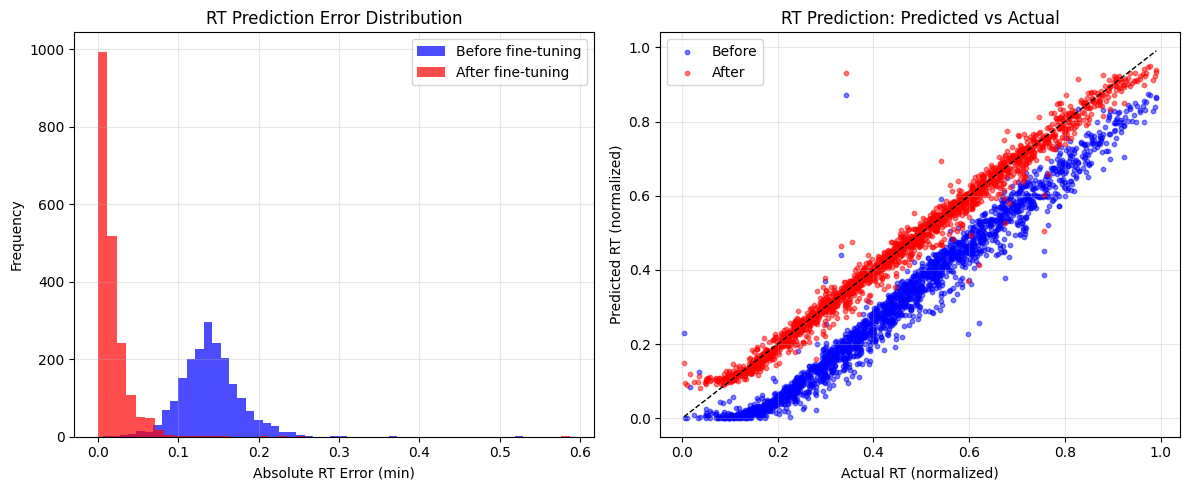

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Error distribution comparison
axes[0].hist(rt_errors_before, bins=50, alpha=0.7, label='Before fine-tuning', color='blue')
axes[0].hist(rt_errors_after, bins=50, alpha=0.7, label='After fine-tuning', color='red')
axes[0].set_xlabel('Absolute RT Error (min)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('RT Prediction Error Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: predicted vs actual
axes[1].scatter(test_psm_df_before['rt_norm'], test_psm_df_before['rt_pred'], 
                alpha=0.5, label='Before', s=10, color='blue')
axes[1].scatter(test_psm_df_after['rt_norm'], test_psm_df_after['rt_pred'], 
                alpha=0.5, label='After', s=10, color='red')
axes[1].plot([test_psm_df_before['rt_norm'].min(), test_psm_df_before['rt_norm'].max()],
             [test_psm_df_before['rt_norm'].min(), test_psm_df_before['rt_norm'].max()],
             'k--', linewidth=1)
axes[1].set_xlabel('Actual RT (normalized)')
axes[1].set_ylabel('Predicted RT (normalized)')
axes[1].set_title('RT Prediction: Predicted vs Actual')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()